![](../images/26-weeks-of-data-science-banner.jpg)

<center><h1> Decision Trees </h1></center>
***
![decision_trees](../images/DT.1.png)

## Program so far
***
- Python Basics and Intermediate
- Descreptive and Inferential Statistics
- Feature Engineering
- Linear Regression
- Logistic Regression

## What are we going to learn today ?
***
- Decision Trees
	- Introduction
	- Representation
	- Intuition
	- Types of Decision Trees based on target variable
	- Terminologies Used
	- Splits in Decision Trees
	- Decision Trees - How does it work ?
	- Gini Index
	- Chi - Square
	- Entropy / Infromation Gain
	- Reduction in Variance
- Shortcomings in decsion Trees
- Setting Constraints
- Advantages of Decision Trees
- Drawbacks of Decision Trees

## Decision Trees - Introduction
***

* Decision trees are one of the most intuitive family of algorithms.
* Extremely easy to understand
* Checkout the decision tree below


## Decision Trees - Representation
***

<center><img src="../images/tree2.png" alt="Drawing" style="width: 600px;"/></center>

## Decision trees - Intuition
***
- Apart from being intuitive, we use decision trees because they can handle non-linearity in data

- Since our observations tend to get jumbled up when we plot them, it's impossible to separate the data points linearly (this is what a simple Logistic Regression model would do) 

- In the image below, is the data Linearly Separable? 

<center><img src="../images/linearlyins.png" alt="Drawing" style="width: 400px;"/></center>

Answer: NO

- This is where Decision Trees are very useful. 
- Through easy computational methods, Decision Trees are capable of complex methods of separation

- But this also leads to ***overfitting***! We will see how to tackle that by tuning some parameters later on

## Decision Trees - Types based on target variable
***
Types of decision tree are based on the type of target variable we have. It can be of two types:

- **Categorical Variable Decision Tree**: Decision Tree which has categorical target variable then it called as categorical variable decision tree. Example:- In above scenario of student problem, where the target variable was “Student will play cricket or not” i.e. YES or NO.  (***CLASSIFICATION***)

- **Continuous Variable Decision Tree**: Decision Tree has continuous target variable then it is called as Continuous Variable Decision Tree.  (***REGRESSION***)


Before diving into the mathematics, let's get a better understanding of the Terminologies used in Decision Trees

## Decision Trees - Terminologies Used
***
Let's look at the basic terminology used with Decision trees:

- **Root Node**: It represents entire population or sample and this further gets divided into two or more homogeneous sets.

- **Splitting**: It is a process of dividing a node into two or more sub-nodes.

- **Decision Node**: When a sub-node splits into further sub-nodes, then it is called decision node.

- **Leaf/ Terminal Node**: Nodes that do not split are called Leaf or Terminal node.

<center><img src="../images/DT98.png" alt="Drawing" style="width: 600px;"/></center>

## Decision Trees - Terminologies Used
***
***
- **Pruning**: When we remove sub-nodes of a decision node, this process is called pruning. You can say opposite process of splitting
- **Branch / Sub-Tree**: A sub section of entire tree is called branch or sub-tree.
- **Parent and Child Node**: A node, which is divided into sub-nodes is called parent node of sub-nodes where as sub-nodes are the child of parent node.

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## SPLITS IN DECISION TREES
***
* It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. 

* A binary split is made on a feature.

* The final result is a tree with decision nodes and leaf nodes.

* The topmost decision node in a tree which corresponds to the best predictor called root node.


## Building our Intuition
***
- As usual, let's build our intuition on a problem based on a sort-of "toy dataset"

- What is this dataset about?
    - Let's say that the movie Dunkirk is running in the theaters
    - Demographically, this movie has got a lot of mixed reviews


- Let's have a look at the dataset

In [46]:
import pandas as pd
import numpy as np
films = pd.read_csv('../data/films.csv')
films.head()

,gender,is_28+,employment_status,watching
0,M,0,student,yes
1,M,1,working,yes
2,F,0,working,yes
3,F,0,student,no
4,M,1,working,yes


<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Decision Trees: How does it work?
***

We'll start with a very simple example: 
- We have a sample of 50 people with three variables Gender (M/F), employment status( Student/ Working) and Age (years)
- Some of these 50 are planning to watch the movie.
- Now, we want to create a model to predict who will watch the movie? In this problem, we need to segregate the sample into who will watch the movie based on highly significant input variable among all three

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Decision Trees: How does it work?
***

- A Decision Tree will segregate the movie watchers based on all values of three variable and identify the variable, which creates the sets so that all the members in the same groups are homogeneous to each other and heterogeneous to the other group.

- Let's start with the target variable. As per the dataset, there are 26 people who want to watch the movie and 24 who don't.

![](../images/DT_master.png)

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Decision Trees: How does it work?
***

- Now, let's see how the three variables affect a person's movie watching decision.

![](../images/DT_MF.png)

![](../images/DT_age.png)

![](../images/DT_emp.png)

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Decision Trees: How does it work?
***

- As you can see from the images that `gender` splits the sample into most homogeneous groups
- We can keep splitting our decision trees in the similar fashion, but as it turns out, mathematicians are smart! They have figured out a better way to split the decision trees. Let's see how.

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## How does a tree decide where to split?
***

- Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes.

- The creation of sub-nodes increases the homogeneity of resultant sub-nodes

- Decision tree **splits the nodes on all available variables** and then selects the split which results in most homogeneous sub-nodes

** splits are done based on **
1. Gini index
2. Entropy
3. Chi Squared
***

* We will understand the calculations behind these 3 concepts using our Film Dataset

<img src="../images/Technical-Stuff.png" alt="Technical Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Gini Index
***

Gini index says, if we select two items from a population at random then they must be of same class and probability for this is 1 if population is pure

* It works with categorical target variable “Success” or “Failure”
* A Gini score gives an idea of how good a split is by how mixed the classes are in the two groups created by the split.
* It measures how often a randomly chosen element would be incorrectly identified.
* A perfect separation results in a Gini score of 0, whereas the worst case split that results in 50/50 classes in each group results in a Gini score of 1.0 (for a 2 class problem).
* Higher the value of Gini higher the homogeneity

## How to Calculate Gini Index?
***
1. Calculate Gini for sub-nodes, using formula sum of square of probability for success and failure 
$$(p^2+ (1-p)^2)$$.
2. Calculate Gini for split using weighted Gini score of each node of that split

Quickly, let's use the "Students" example to build our intuition.

Before starting to split our Film Dataset based on a variable, let's see how many watched Dunkirk from our sample

In [47]:
print("Viewers who watched the movie:{}".format(len(films[films['watching'] == 'yes'])))
print("Viewers who did not watch the movie:{}".format(len(films[films['watching'] == 'no'])))

Viewers who watched the movie:26
Viewers who did not watch the movie:24


## SPLIT BASED ON GENDER :
***

In [48]:
crosstab1 = pd.crosstab(index=films["watching"], columns=films["gender"])
crosstab1

gender,F,M
watching,,
no,8,16
yes,14,12


** Probabilities Calculation of male and female:**
***
 $$ Females\hspace{0.3cm}watched\hspace{0.3cm}(yes) = \frac{females\hspace{0.3cm}who\hspace{0.3cm}watched\hspace{0.3cm}movies}{total\hspace{0.3cm}females}$$

$$ Males\hspace{0.3cm}watched\hspace{0.3cm}(yes) = \frac{males\hspace{0.3cm}who\hspace{0.3cm}watched\hspace{0.3cm}movies}{total\hspace{0.3cm}males}$$


In [49]:
male_watched_yes = (12/float(28))
female_watched_yes = (14/float(22))

print("Probability of males that watched Dunkirk:{:.3f}".format(male_watched_yes))
print("Probability of females that watched Dunkirk:{:.3f}".format(female_watched_yes))

Probability of males that watched Dunkirk:0.429
Probability of females that watched Dunkirk:0.636


** Gini Index Calculation for Males & Females**
***
$$gini(females)=(females\hspace{0.3cm}watched\hspace{0.3cm}yes)^2+(1-females\hspace{0.3cm}watched\hspace{0.3cm}yes)^2$$

$$ gini(males)=(males\hspace{0.3cm}watched\hspace{0.3cm}yes)^2+(1-males\hspace{0.3cm}watched\hspace{0.3cm}yes)^2$$

In [50]:
subnode_male = (male_watched_yes)**2 + (1-male_watched_yes)**2
subnode_female = (female_watched_yes)**2 + (1-female_watched_yes)**2

print("Gini(female):{:.3f}".format(subnode_female))
print("Gini(male):{:.3f}".format(subnode_male))

Gini(female):0.537
Gini(male):0.510


**Weighted Gini Index Calculation for Gender Split:**
***
$weighted\hspace{0.3cm}gini(gender)=\frac{males}{total}x(gini(males))+\frac{females}{total}x(gini(females))$

In [51]:
calculated_wt_gender = (28/float(50))*subnode_male + (22/float(50))*subnode_female
print("Weighted Gini for Gender:{:.4f}".format(calculated_wt_gender))

Weighted Gini for Gender:0.5221


## SPLIT BASED ON EMPLOYMENT
***

In [52]:
crosstab2 = pd.crosstab(index=films["watching"], columns=films["employment_status"])
crosstab2

employment_status,student,working
watching,,
no,5,19
yes,4,22


**Probabilities Calculation :**
$$(working\hspace{0.3cm}watched\hspace{0.3cm}yes)=\frac{(working\hspace{0.3cm}professionals\hspace{0.3cm}who\hspace{0.3cm}watched\hspace{0.3cm}movie)}{(total\hspace{0.3cm}working)}$$

$$(student\hspace{0.3cm}watched\hspace{0.3cm}yes)=\frac{(students\hspace{0.3cm}\hspace{0.3cm}who\hspace{0.3cm}watched\hspace{0.3cm}movie)}{(total\hspace{0.3cm}students)}$$

In [53]:
student_watched_yes = (4/float(9))
working_watched_yes = (22/float(41))
print("Probability of students that watched:{:.3f}".format(student_watched_yes))
print("Probability of working people that watched:{:.3f}".format(working_watched_yes))

Probability of students that watched:0.444
Probability of working people that watched:0.537


**Gini Index Calculation :**
![](../images/img2.png)
$$gini(working)=(working\hspace{0.3cm}watched\hspace{0.3cm}yes)^2+(1-working\hspace{0.3cm}watched\hspace{0.3cm}yes)^2$$

$$gini(students)=(students\hspace{0.3cm}watched\hspace{0.3cm}yes)^2+(1-students\hspace{0.3cm}watched\hspace{0.3cm}yes)^2$$
* calculating Gini index for students who watched
* calculating Gini index for employees who watched 

In [54]:
subnode_student = (student_watched_yes)**2 + (1 - student_watched_yes)**2
subnode_working = (working_watched_yes)**2 + (1 - working_watched_yes)**2

print("Gini(student):{:.3f}".format(subnode_student))
print("Gini(working):{:.3f}".format(subnode_working))

Gini(student):0.506
Gini(working):0.503


**Weighted Gini Index for Employment Split :** 

In [55]:
calculated_wt_emp = (41/float(50))*subnode_working + (9/float(50))*subnode_student
print("Weighted Gini(employment):{:.4f}".format(calculated_wt_emp))

Weighted Gini(employment):0.5033


### Since weighted gini(gender) > weighted gini(employment), the node split will take on Gender
***
- And now, you have developed a very strong basis on how splits take place based on the Gini Index/Score of Variables 
- Can you imagine how time consuming it would be if we had around 50+ variables? Not practical 
- Luckily, Sci-Kit Learn makes this easy for us 

- This also helps us judging the importance of variables. There's definitely a function to display the variables to and this could aid in Feature Selection as well. 

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Chi-Square
***

It is an algorithm to find out the statistical significance between the differences between sub-nodes and parent node. We measure it by sum of squares of standardized differences between observed and expected frequencies of target variable.

1. It works with categorical target variable “Success” or “Failure”
2. It can perform two or more splits
3. Higher the value of Chi-Square higher the statistical significance of differences between sub-node and Parent node.


<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Chi-Square
***

4. Chi-Square of each node is calculated using formula,
5. Chi-square = $((Actual – Expected)^2 / Expected)^{1/2}$
6. It generates tree called CHAID (Chi-square Automatic Interaction Detector)

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Chi-Square
***

### Steps to Calculate Chi-Square: 

1. Calculate Chi-square for individual node by calculating the deviation for Success and Failure both
2. Calculated Chi-square of Split using Sum of all Chi-square of success and Failure of each node of the split

## Coming back to Dunkirk 
***
 - Let's now perform similar calculation in Python on our Dunkirk example.
 - By now you should get a good idea how this notebook is laid out. 
     - We're first building our intuition on an easy example (Students) 
     - Then we're directly calculating, in Python, the different scores for our Dunkirk Dataset
     

## Dunkirk - Split on Gender
***
**Gender Node**



In [56]:
crosstab1 = pd.crosstab(index=films["gender"], columns=films["watching"])
crosstab1["Total"] = crosstab1.no + crosstab1.yes
crosstab1

watching,no,yes,Total
gender,,,
F,8,14,22
M,16,12,28


**Calculate the expected women who watch movie**

In [57]:
# calculate the expected women who watch movie

crosstab1["Expected watch"] = crosstab1.Total/2
crosstab1["Expected not watch"] = crosstab1.Total/2
crosstab1

watching,no,yes,Total,Expected watch,Expected not watch
gender,,,,,
F,8,14,22,11.0,11.0
M,16,12,28,14.0,14.0


### Calculating deviation
***

In [58]:
crosstab1["E - O (Watch)"] = crosstab1["Expected watch"] - crosstab1.yes
crosstab1["E - O (Not Watch)"] = crosstab1["Expected not watch"] - crosstab1.no
crosstab1

watching,no,yes,Total,Expected watch,Expected not watch,E - O (Watch),E - O (Not Watch)
gender,,,,,,,
F,8,14,22,11.0,11.0,-3.0,3.0
M,16,12,28,14.0,14.0,2.0,-2.0


** Formula to calculate chi-square : **
***
$$\tilde{\chi}^2=(\frac{(actual-expected)^2}{expected})^{1/2}$$

* calculating the chi square value for women

In [59]:
crosstab1["chi2_watch"] = np.sqrt(crosstab1["E - O (Watch)"]**2/crosstab1["Expected watch"])
crosstab1["chi2_not_watch"] = np.sqrt(crosstab1["E - O (Not Watch)"]**2/crosstab1["Expected not watch"])
crosstab1

watching,no,yes,Total,Expected watch,Expected not watch,E - O (Watch),E - O (Not Watch),chi2_watch,chi2_not_watch
gender,,,,,,,,,
F,8,14,22,11.0,11.0,-3.0,3.0,0.904534,0.904534
M,16,12,28,14.0,14.0,2.0,-2.0,0.534522,0.534522


In [60]:
chi2_gender = (crosstab1["chi2_watch"] + crosstab1["chi2_not_watch"]).sum()
chi2_gender

2.8781130351162796

**Split on Employment Status**
***
* We will perform Similar Calculations for splits on the *Employment Status* node
* Get the total chi-squared value & compare it to our previous result to see which split is more effective

In [61]:
crosstab2 = pd.crosstab(index=films["employment_status"], columns=films["watching"])
crosstab2["Total"] = crosstab2.no + crosstab2.yes

crosstab2["Expected watch"] = crosstab2.Total/2
crosstab2["Expected not watch"] = crosstab2.Total/2

crosstab2["E - O (Watch)"] = crosstab2["Expected watch"] - crosstab2.yes
crosstab2["E - O (Not Watch)"] = crosstab2["Expected not watch"] - crosstab2.no

crosstab2["chi2_watch"] = np.sqrt(crosstab2["E - O (Watch)"]**2/crosstab2["Expected watch"])
crosstab2["chi2_not_watch"] = np.sqrt(crosstab2["E - O (Not Watch)"]**2/crosstab2["Expected not watch"])

crosstab2

watching,no,yes,Total,Expected watch,Expected not watch,E - O (Watch),E - O (Not Watch),chi2_watch,chi2_not_watch
employment_status,,,,,,,,,
student,5,4,9,4.5,4.5,0.5,-0.5,0.235702,0.235702
working,19,22,41,20.5,20.5,-1.5,1.5,0.331295,0.331295


In [62]:
chi2_emp = (crosstab2["chi2_watch"] + crosstab2["chi2_not_watch"]).sum()
chi2_emp

1.133993677240111

** Chi-squared values for GENDER is more than in employment status**
***

$\tilde{\chi}^2$ test also agrees with the Gini Index.

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Entropy / Information Gain
***

From the image below, which of the three options can be described ***easily***?
***
<center><img src="../images/dt7.png" alt="Drawing" style="width: 650px;"/></center>

Image Source : https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Entropy / Information Gain
***

- C because it requires less information as all the values are similar
- On the other hand, B requires more information to describe it 
- A requires the maximum amount of information

In other words, we can say that C is a Pure node, B is less Impure and A is more impure.

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Entropy / Information Gain
***

- Now, we can conclude that less impure node requires less information to describe it

- Concretely, a very impure node requires more information

- **Information theory is a measure to define this degree of disorganization in a system known as Entropy.**

- If the sample is completely homogeneous, then the entropy is zero and if the sample is an equally divided (50% – 50%), it has entropy of one. Let's understand how this is calculated and see what Information Gain really means

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Entropy / Information Gain
***
Entropy can be calculated using formula:-

$$ Entropy = -plog_{2}(p) - qlog_{2}(q) $$

Here p and q are the probabilities of success and failure respectively in that node
- Entropy is also used with categorical target variables. 
- It chooses the split which has lowest entropy compared to parent node and other splits
- The lesser the entropy, the better it is.

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Entropy / Information Gain
***

$$Information Gain = Entropy of Parent node - [Weighted Avg]Entropy of Subnodes$$

Steps to calculate entropy for a split:

1. Calculate entropy of parent node
2. Calculate entropy of each individual node of split and calculate weighted average of all sub-nodes available in split.

** Now, let's build our intuition on the Students example, really quickly** 

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Entropy / Information Gain
***

Above, you can see that entropy for Split on Gender is the lowest among all, so the tree will split on Gender

Can you calculate the Information Gain for each split? It's pretty easy 
   - Remember: We are trying to **Maximize** Information Gain 
   - Which is **WHY**, mathematically, we choose the *minimum variable of Entropy* 

## Coming back to Dunkirk
***
Let's try and calculate the Entropy of the Parent node for the Dunkirk Dataset 

As usual, we're first going to try and split the node by Gender and then based on their Employment Status 

Let's calculate the entropy for the parent node: 

In [63]:
# Calculating the parent entropy
p = 26/float(50)
q = 24/float(50)
parent_entropy = -p*np.log2(p) - q*np.log2(q)
parent_entropy

0.9988455359952018

Such a high entropy value suggest that this is almost an **impure** node.

- Now, since we're splitting on the basis of Gender, let's calculate the Entropy for the Female and Male nodes

In [64]:
crosstab1.iloc[:,:2]

watching,no,yes
gender,,
F,8,14
M,16,12


In [65]:
# Female node entropy
p = 14/float(22)
q = 8/float(22)
female_entropy = -p*np.log2(p) - q*np.log2(q)
female_entropy

0.9456603046006401

In [66]:
# Male node entropy
p = 12/float(28)
q = 16/float(28)
male_entropy = -p*np.log2(p) - q*np.log2(q)
male_entropy

0.9852281360342515

In [67]:
#Weighted entropy for gender
weighted_gender = (28/float(50))*male_entropy + (22/float(50))*female_entropy
weighted_gender

0.9678182902034626

Can you calculate the Information Gain now? 
 - You have the Entropy of the Parent Node 
 - You have Weighted Average Entropy of the Female and Male nodes

In [68]:
## Calculate here

Now, let's do similar calculations if we were splitting our dataset on the basis of *Employment Status*

In [69]:
crosstab2.iloc[:,:2]

watching,no,yes
employment_status,,
student,5,4
working,19,22


In [70]:
#entropy for students
p = 4/float(9)
q = 5/float(9)
student_entropy = -p*np.log2(p) - q*np.log2(q)
student_entropy

0.9910760598382222

In [71]:
# entropy for working people
p = 22/float(41)
q = 19/float(41)

working_entropy = -p*np.log2(p) - q*np.log2(q)
working_entropy

0.9961344835095796

In [72]:
weighted_entropy = (41/float(50))*working_entropy + (9/float(50))*student_entropy
weighted_entropy

0.9952239672487352

Since gender has least entropy, we will split the decision tree at gender. This is again in agreement with previous methods.

## Reduction in Variance
***
- Reduction in variance is an algorithm used for continuous target variables.
- This algorithm uses standard formula of variance to choose the split. 

- The split with lower variance is selected as the criteria to split the problem :  
***
<center><img src="../images/dt10.png" alt="Drawing" style="width: 150px;"/></center>

Above X-bar is mean of the values, X is actual/observed value and n is number of values.

## Steps to calculate Variance:
***
1) Calculate variance for each node

2) Calculate variance for each split as weighted average of each node variance

Above, you can see that the Gender split has lower variance compared to the parent node, so the split would take place on Gender variable.

## Coming back to Dunkirk, again
***

* Let's assign 1 if someone is watching the film and 0 if he/she isn't watching the film 
* Based on this, let's perform the Variance Calculations 

In [73]:
mean_root = (26*1 + 24*0)/float(50)
mean_root

0.52

In [74]:
var_root = (26*(1-0.52)**2 + 24*(0-0.52)**2)/50
var_root

0.24960000000000002

* Similarly, calculating variance for gender split we get: 

In [75]:
crosstab1.iloc[:,:3]

watching,no,yes,Total
gender,,,
F,8,14,22
M,16,12,28


In [76]:
mean_women = (14*1 + 8*0)/float(22)
mean_women

0.6363636363636364

In [77]:
# variance for women
var_women = (14*(1-0.636)**2 + 8*(0-0.636)**2)/22
var_women

0.23140509090909092

In [78]:
mean_men = (12*1 + 16*0)/float(28)
mean_men

0.42857142857142855

In [79]:
# variance for men

var_men = (12*(1 - mean_men)**2 + 16* (0 - mean_men)**2)/28
var_men

0.24489795918367346

In [80]:
# Weighted variance for gender split
weighted_variance = (28/float(50)*var_men) + (22/float(50)*var_women)
weighted_variance

0.23896109714285715

* Now let's do the needful if we're splitting our parent node based on *Employment Status*

In [81]:
crosstab_var = crosstab2.iloc[:,:3]

In [82]:
crosstab_var["average"] = crosstab_var.yes*1/crosstab_var.Total
crosstab_var

watching,no,yes,Total,average
employment_status,,,,
student,5,4,9,0.444444
working,19,22,41,0.536585


In [83]:
# variance

crosstab_var["variance"] = (crosstab_var.yes * (1 - crosstab_var.average)**2 
                            + crosstab_var.no * (0 - crosstab_var.average)**2) / crosstab_var.Total

crosstab_var

watching,no,yes,Total,average,variance
employment_status,,,,,
student,5,4,9,0.444444,0.246914
working,19,22,41,0.536585,0.248662


In [84]:
weighted_emp = (41/float(50))*crosstab_var.loc["working", "variance"]\
                    + (9/float(50))*crosstab_var.loc["student", "variance"]
weighted_emp

0.24834688346883468

**Here, variance (weighted_emp) split is slightly higher than variance (weighted_gender) split.**
***
- Above, you can see that Gender split has lowest variance compare to parent node, so the split would take place on Gender variable.

## Python Implementation
***

- We have learned, to quite some detail, how the algorithm decides to split the parent node
- Let's see how to implement a decision tree model in Python! 

- Let's import the necessary libraries, etc. We already know how to do this

In [85]:
# Importing necessary packages
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [86]:
# Reading data & seperating it into train and test
# Splitting the data into training and target set

dataframe = pd.read_csv('../data/loan_prediction.csv')
X = dataframe.iloc[:,0:5]
y = dataframe.iloc[:,5]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

**Decision Tree using the Gini Index criterion**
***
- Here, let's check the accuracy of the Gini Index method on our training set. 
- Do you remember how Accuracy is calculated? 
    - If not, now is a good time to pause and ponder. It has something to do with the Confusion Matrix..

In [87]:
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train,y_train)

y_prediction_gini = clf_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test,y_prediction_gini)

accuracy_gini

0.6432432432432432

**Decision Tree using the Information Gain / Entropy criterion**
***
- Similar calculations here too.

- We saw that for the Gini Index method we got an accuracy of ~64.5% 

In [88]:
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train,y_train)
y_prediction_entropy = clf_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test,y_prediction_entropy)
accuracy_entropy

0.6756756756756757

## Plotting a decision tree

Decision tree can be plotted using `pydotplus`. Here is an example. For this you will have to install pydotplus.<br/>
Do a `pip install pydotplus` <br/>
And also do a `sudo apt-get install graphviz` in your terminal

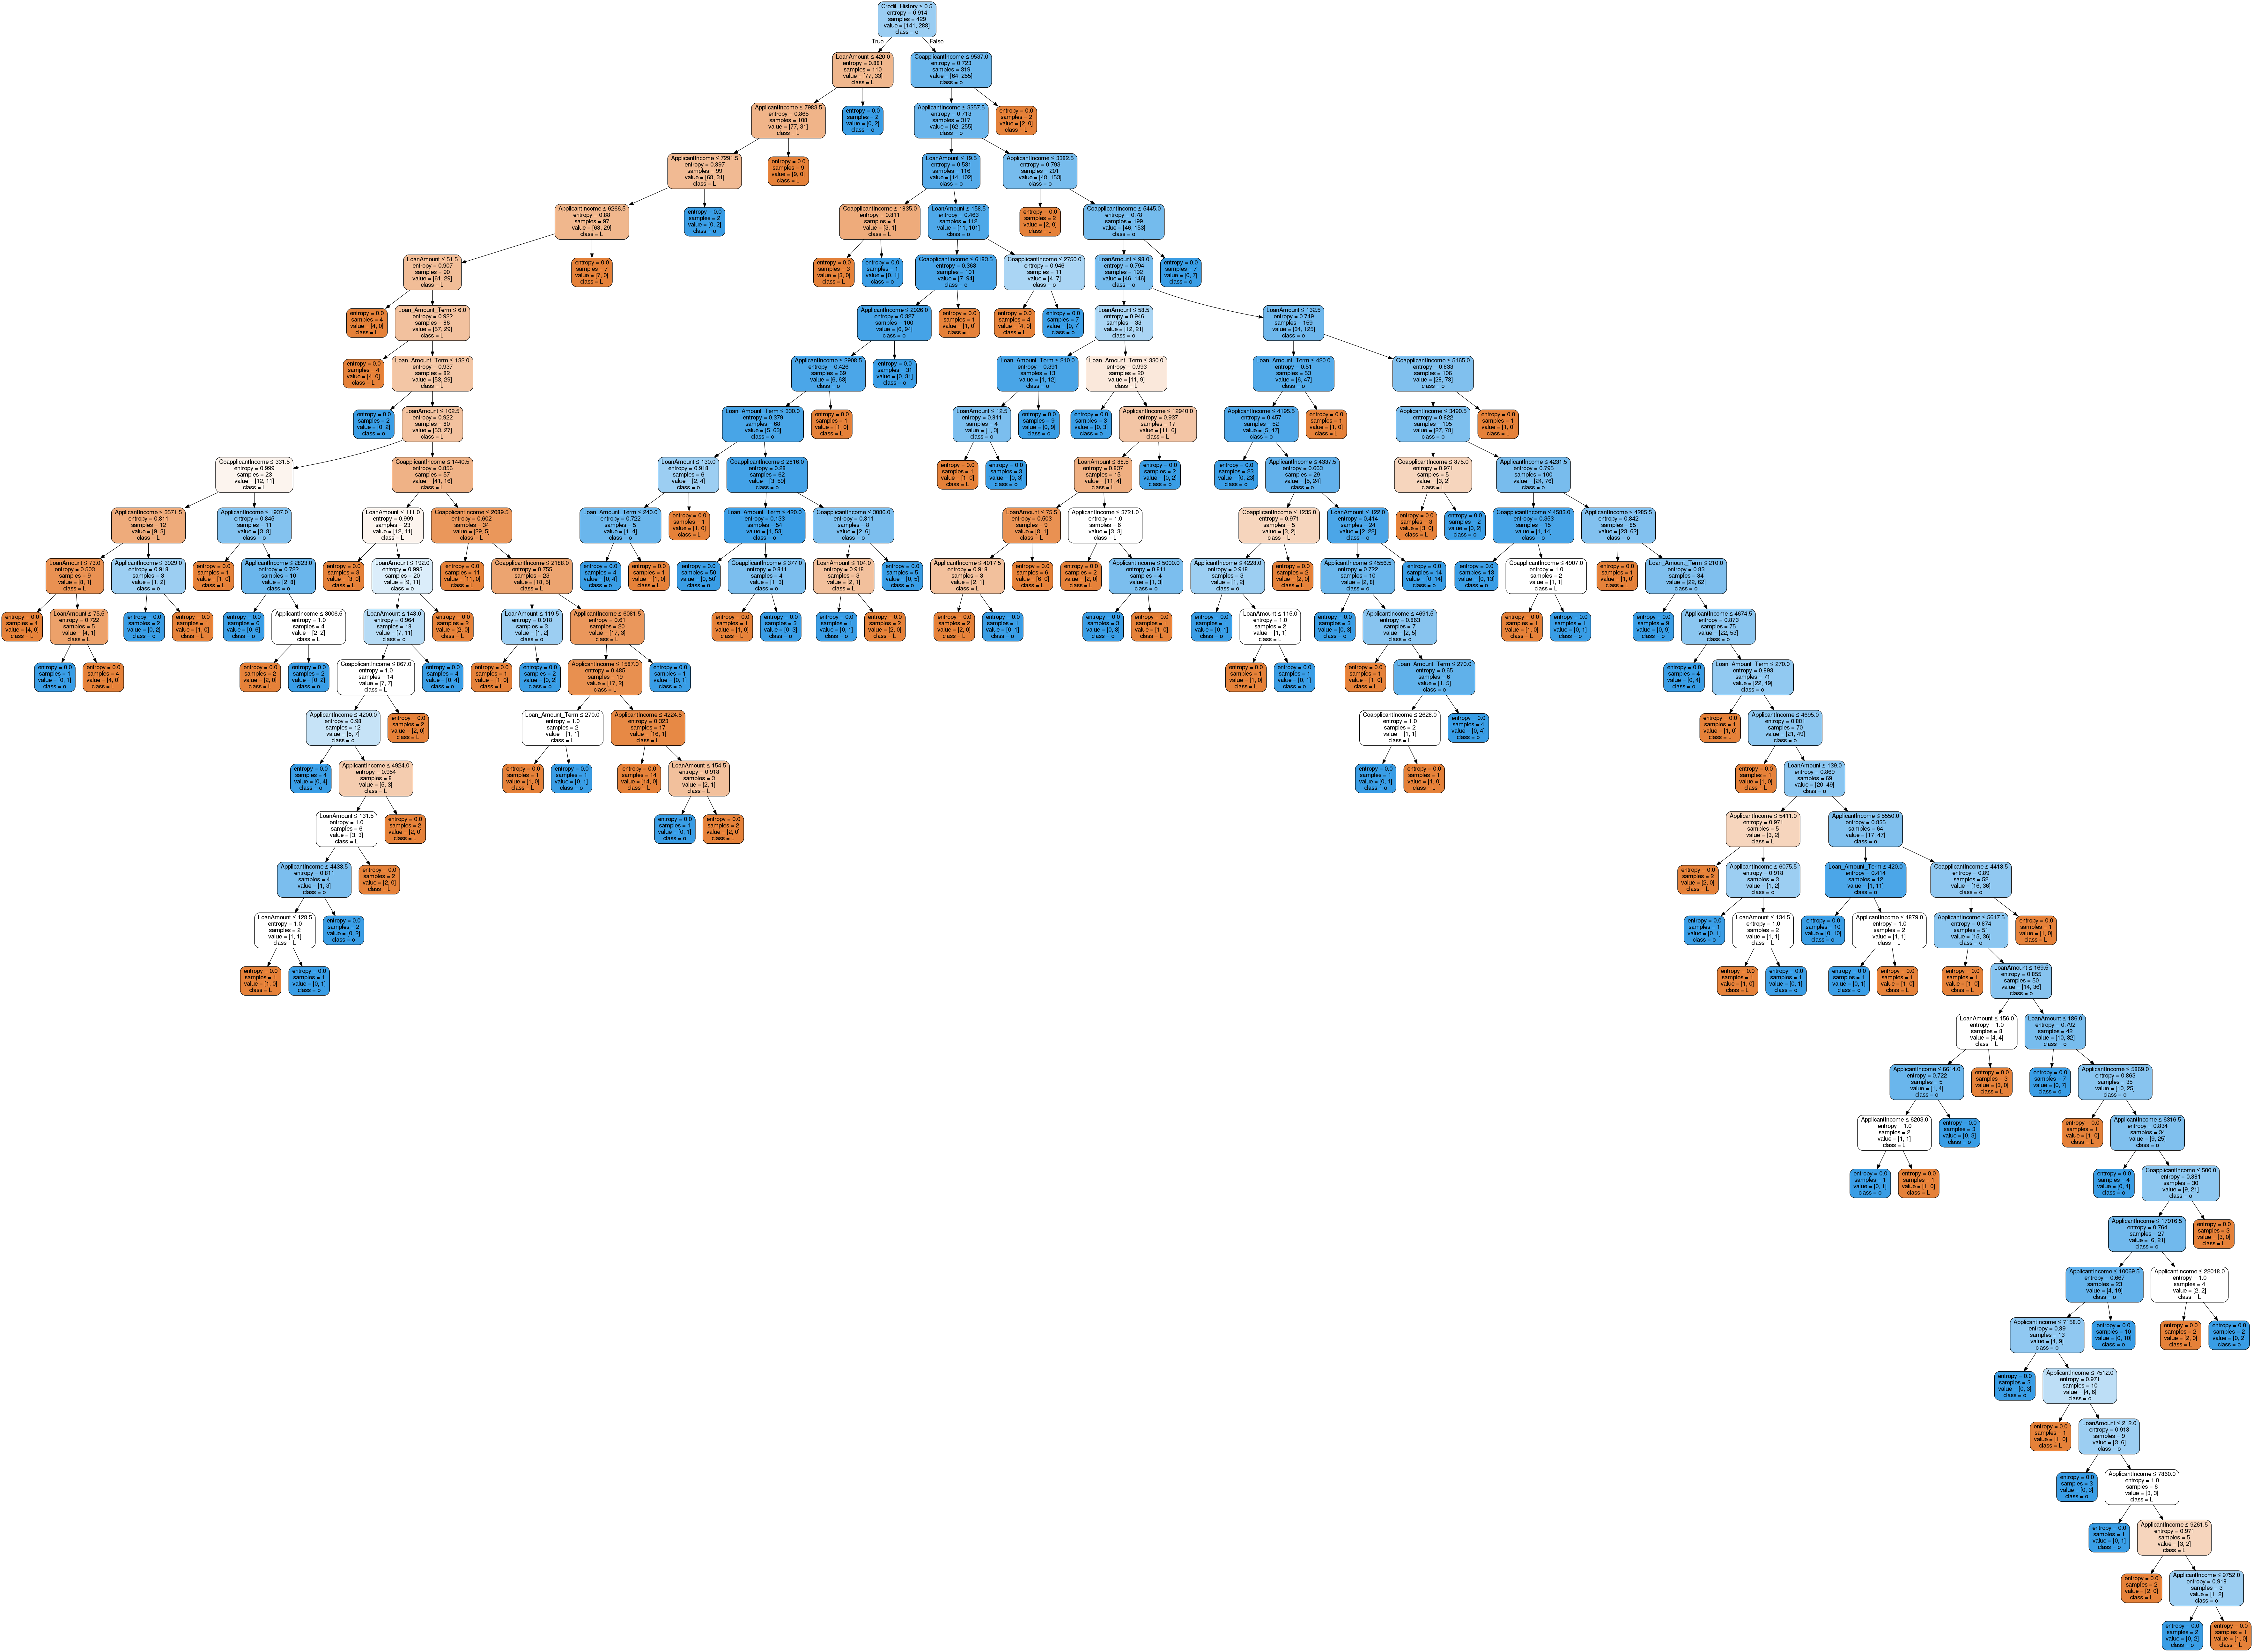

In [89]:
from sklearn import tree
import pydotplus
from IPython.display import Image
X = 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'
y = 'Loan_Status'
dot_data = tree.export_graphviz(clf_entropy, out_file=None,
                               feature_names=X,
                               class_names=y,
                               filled=True, rounded=True,
                               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

- Let's alter some parameters of this Decision Tree in order to prevent over-fitting and get a better accuracy. (we got accuracies below ~ 70% which suggest that our models were not that good) 

So, what are the key parameters of tree modeling and how can we avoid over-fitting in decision trees?

 - Let's discuss this and build our intuition

## Shortcomings decision trees

- Overfitting is one of the key challenges faced while modeling decision trees
- If there is no limit set of a decision tree, it will give you 100% accuracy on training set because in the worse case it will end up making 1 leaf for each observation
- Thus, preventing overfitting is pivotal while modeling a decision tree and it can be done in 2 ways:

    - Setting constraints on tree size
    - Tree pruning

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Setting Constraints 
***

- First, lets look at the general structure of a decision tree:

<center><img src="../images/dt12.png" alt="Drawing" style="width: 750px;"/></center>
<br/>
Image Source : https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/

**Minimum samples for a node split**
 - Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting.
 - Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
 - Too high values can lead to under-fitting hence, it should be tuned using CV.




**Minimum samples for a terminal node (leaf)**
 - Defines the minimum samples (or observations) required in a terminal node or leaf.
 - Used to control over-fitting similar to min_samples_split.
 - Generally lower values should be chosen for imbalanced class problems because the regions in which the minority class will be in majority will be very small.


**Maximum depth of tree (vertical depth)**

- Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
- Should be tuned using CV.

**Maximum number of terminal nodes**
 - The maximum number of terminal nodes or leaves in a tree.
 - Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of $2^n$ leaves.

**Maximum features to consider for split**
 - The number of features to consider while searching for a best split. These will be randomly selected.
 - As a thumb-rule, square root of the total number of features works great but we should check upto 30-40% of the total number of features.
 - Higher values can lead to over-fitting but depends on case to case.

## Approach -2 : Effect of varying max_depth
***

Let's choose **Depths of 2 and 5 respectively **and then compared the results to see which is better

In [90]:
clf_1 = DecisionTreeClassifier(max_depth = 2)
clf_1.fit(X_train,y_train)

clf_2 = DecisionTreeClassifier(max_depth = 5)
clf_2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [91]:
# predicting for both max depth 2 and 5.

y_clf_1 = clf_1.predict(X_test)
y_clf_2 = clf_2.predict(X_test)

In [92]:
#calculate accuracy
accuracy_clf_1 = accuracy_score(y_test,y_clf_1)
accuracy_clf_2 = accuracy_score(y_test,y_clf_2)

In [93]:
accuracy_clf_1

0.7621621621621621

In [94]:
accuracy_clf_2

0.7405405405405405

## Better Results: 
***
- By comparing these results with what we got before 
- We can notice that the accuracies of both these models is better than the models before ( ~ 64%) 

**NOTE** : In Python, the default criterion to make the splits is the Gini Index unless specified otherwise!

## Advantages of Decision Trees: 
***
1) Easy to Understand: 
- Decision tree output is very easy to understand even for people from non-analytical background. 
- It does not require any statistical knowledge to read and interpret them.
- Its graphical representation is very intuitive and users can easily relate their hypothesis.




2) Useful in Data exploration: 
- Decision tree is one of the fastest way to identify most significant variables and relation between two or more variables. - With the help of decision trees, we can create new variables / features that has better power to predict target variable. -  It can also be used in data exploration stage. For example, we are working on a problem where we have information available in hundreds of variables, there decision tree will help to identify most significant variable.

3) Less data cleaning required: 
- It requires less data cleaning compared to some other modeling techniques.
- It is not influenced by outliers and missing values to a fair degree.


4) Data type is not a constraint:
- It can handle both numerical and categorical variables.

5) Non Parametric Method: 
- Decision tree is considered to be a non-parametric method. 
- This means that decision trees have no assumptions about the space distribution and the classifier structure.

## Drawbacks of Decision Trees
***
* Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting.

* Decision trees can be unstable because small variations in the data might result in a completely different tree being generated.

* Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

<img src="../images/Recap.png" alt="Recap" style="width: 100px;float:left; margin-right:15px"/>
<br />

# In-session Recap Time
***

- What is Decision Trees and how to use it?
- Splits in Decision Trees
    - Gini Index
    - Entropy
    - Chi Squared
- Advantages of Decision Trees
- Drawbacks of Decsion Trees


In [95]:
df_wbc = pd.read_csv('../data/wbc.csv')
df_wbc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 1
***

Drop the column `Unnamed: 32` from diabetes dataset and split the predictors and target variables into variables X and y for training and testing and then use `train_test_split`

In [96]:
from sklearn.model_selection import train_test_split as tts




<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 2
***

On the wbc dataset loaded and split into train and test above, fit a decision tree classifier model with `max_depth=4`, `min_samples_leaf=0.16`, `random_state=1`

In [97]:
from sklearn.tree import DecisionTreeClassifier



<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 3
***

Check the accuracy score for the model and classification report for the model

In [98]:
from sklearn.metrics import accuracy_score,classification_report



<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 4
***

Create a dictionary having possible parameter as `max_depth` with length equal to total number of samples. Create the GridSearchCV object. Fit the data with the best possible parameters. 

In [99]:
from sklearn.model_selection import GridSearchCV




<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 5
***

Print the best estimator with it's parameters. And also the best score

# Thank You
***
### Coming up next...
***
- Ensembling & Random Forest

For more queries - Reach out to academics@greyatom.com 